# Importando librerías

In [8]:
import pandas as pd
import numpy as np
# Valores faltantes
import missingno as msno
# Atípicos
import matplotlib.pyplot as plt
import seaborn as sns

from rich.console import Console
from rich.table import Table
from rich.panel import Panel
from rich.prompt import Prompt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score





# Importando la base de datos

In [9]:
df = pd.read_csv('./db/hotel_bookings.csv', encoding='ISO-8859-1')

# Anális exploratorio

### Nota
ADR: Tarifa Diaria Promedio (Average Daily Rate)

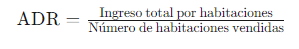

In [ ]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07/09/2017


In [13]:
promedio_adr_por_hotel = df.groupby('hotel')['adr'].mean()
print(promedio_adr_por_hotel)

hotel
City Hotel      105.304465
Resort Hotel     94.952930
Name: adr, dtype: float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Valores nulos

<AxesSubplot:>

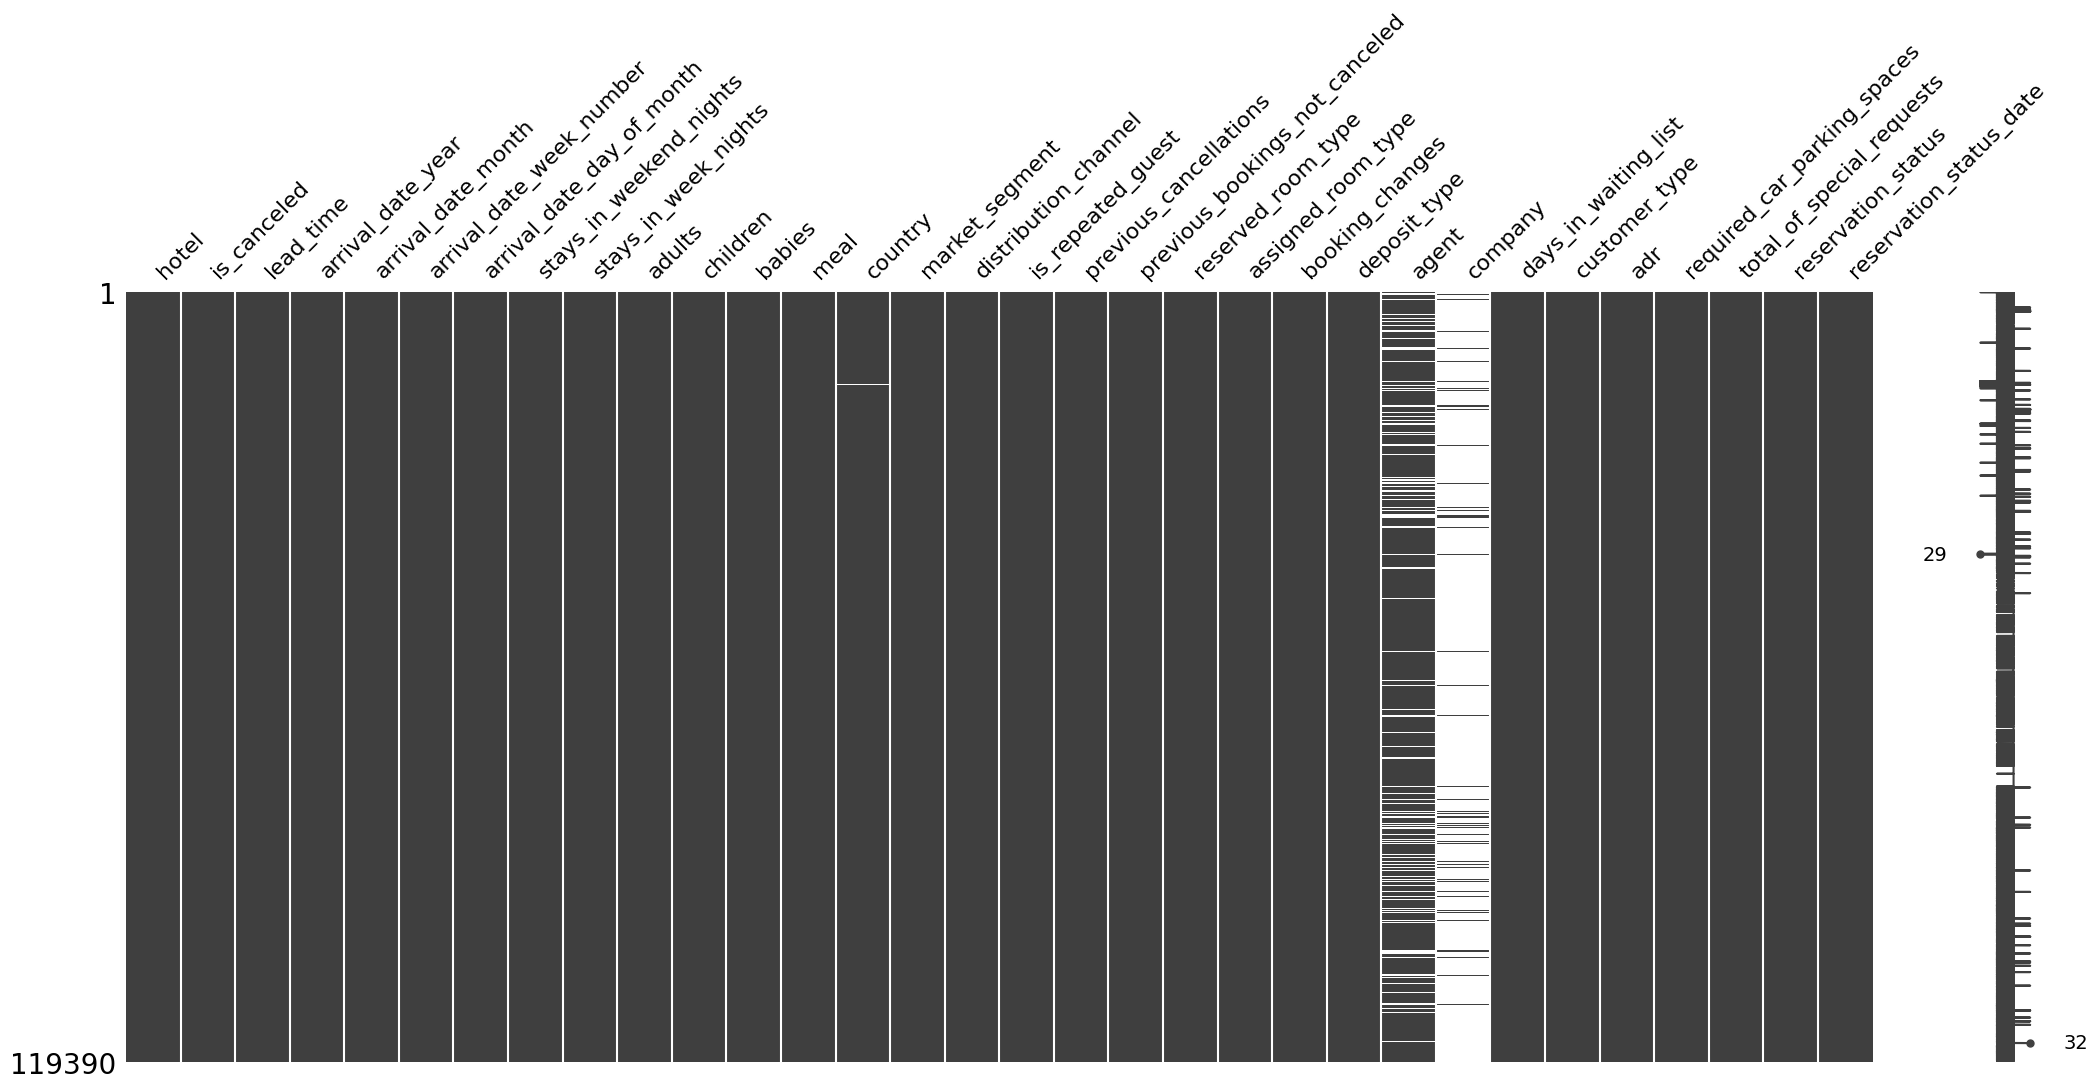

In [7]:
# Matriz de valores faltantes

msno.matrix(df)


In [15]:
# Otra forma de verlo

df_nulos = df.isnull().sum()

df_nulos

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Notas

las columnas children, country, agent, y company tienen valores nulos. La columna company tiene una cantidad significativa de valores nulos (112,593 de 119,390 registros), lo que representa aproximadamente el 94% de los datos. La columna agent tiene 16,340 valores nulos, y country tiene 488 valores nulos.

### Inputación 

In [4]:
df['children'].fillna(df['children'].median(), inplace=True)
df['country'].fillna('Desconocido', inplace=True)

### Eliminación

In [5]:
df.drop(columns=['agent', 'company'], inplace=True)

## Valores Duplicados

In [6]:
duplicados_todas_columnas = df[df.duplicated(keep=False)]
print(f"Número de registros duplicados en todas las columnas: {duplicados_todas_columnas.shape[0]}")


Número de registros duplicados en todas las columnas: 40208


In [7]:
# Eliminar registros duplicados
df_sin_duplicados = df.drop_duplicates(keep='first')
print(f"Número de registros después de eliminar duplicados: {df_sin_duplicados.shape[0]}")


Número de registros después de eliminar duplicados: 87370


In [8]:
duplicados_todas_columnas = df_sin_duplicados[df_sin_duplicados.duplicated(keep=False)]
print(f"Número de registros duplicados en todas las columnas: {duplicados_todas_columnas.shape[0]}")

Número de registros duplicados en todas las columnas: 0


In [9]:
# Identificar registros duplicados por columna
for col in df.columns:
    duplicados = df[df.duplicated(subset=[col], keep=False)]
    print(f"Número de registros duplicados en la columna {col}: {duplicados.shape[0]}")



Número de registros duplicados en la columna hotel: 119390
Número de registros duplicados en la columna is_canceled: 119390
Número de registros duplicados en la columna lead_time: 119378
Número de registros duplicados en la columna arrival_date_year: 119390
Número de registros duplicados en la columna arrival_date_month: 119390
Número de registros duplicados en la columna arrival_date_week_number: 119390
Número de registros duplicados en la columna arrival_date_day_of_month: 119390
Número de registros duplicados en la columna stays_in_weekend_nights: 119388
Número de registros duplicados en la columna stays_in_week_nights: 119382
Número de registros duplicados en la columna adults: 119385
Número de registros duplicados en la columna children: 119389
Número de registros duplicados en la columna babies: 119388
Número de registros duplicados en la columna meal: 119390
Número de registros duplicados en la columna country: 119360
Número de registros duplicados en la columna market_segment: 

In [28]:
# Identificar registros duplicados por columna
for col in df_sin_duplicados.columns:
    duplicados = df_sin_duplicados[df_sin_duplicados.duplicated(subset=[col], keep=False)]
    print(f"Número de registros duplicados en la columna {col}: {duplicados.shape[0]}")

Número de registros duplicados en la columna hotel: 87370
Número de registros duplicados en la columna is_canceled: 87370
Número de registros duplicados en la columna lead_time: 87348
Número de registros duplicados en la columna arrival_date_year: 87370
Número de registros duplicados en la columna arrival_date_month: 87370
Número de registros duplicados en la columna arrival_date_week_number: 87370
Número de registros duplicados en la columna arrival_date_day_of_month: 87370
Número de registros duplicados en la columna stays_in_weekend_nights: 87368
Número de registros duplicados en la columna stays_in_week_nights: 87362
Número de registros duplicados en la columna adults: 87365
Número de registros duplicados en la columna children: 87369
Número de registros duplicados en la columna babies: 87368
Número de registros duplicados en la columna meal: 87370
Número de registros duplicados en la columna country: 87338
Número de registros duplicados en la columna market_segment: 87370
Número d

# After cleaned

<AxesSubplot:>

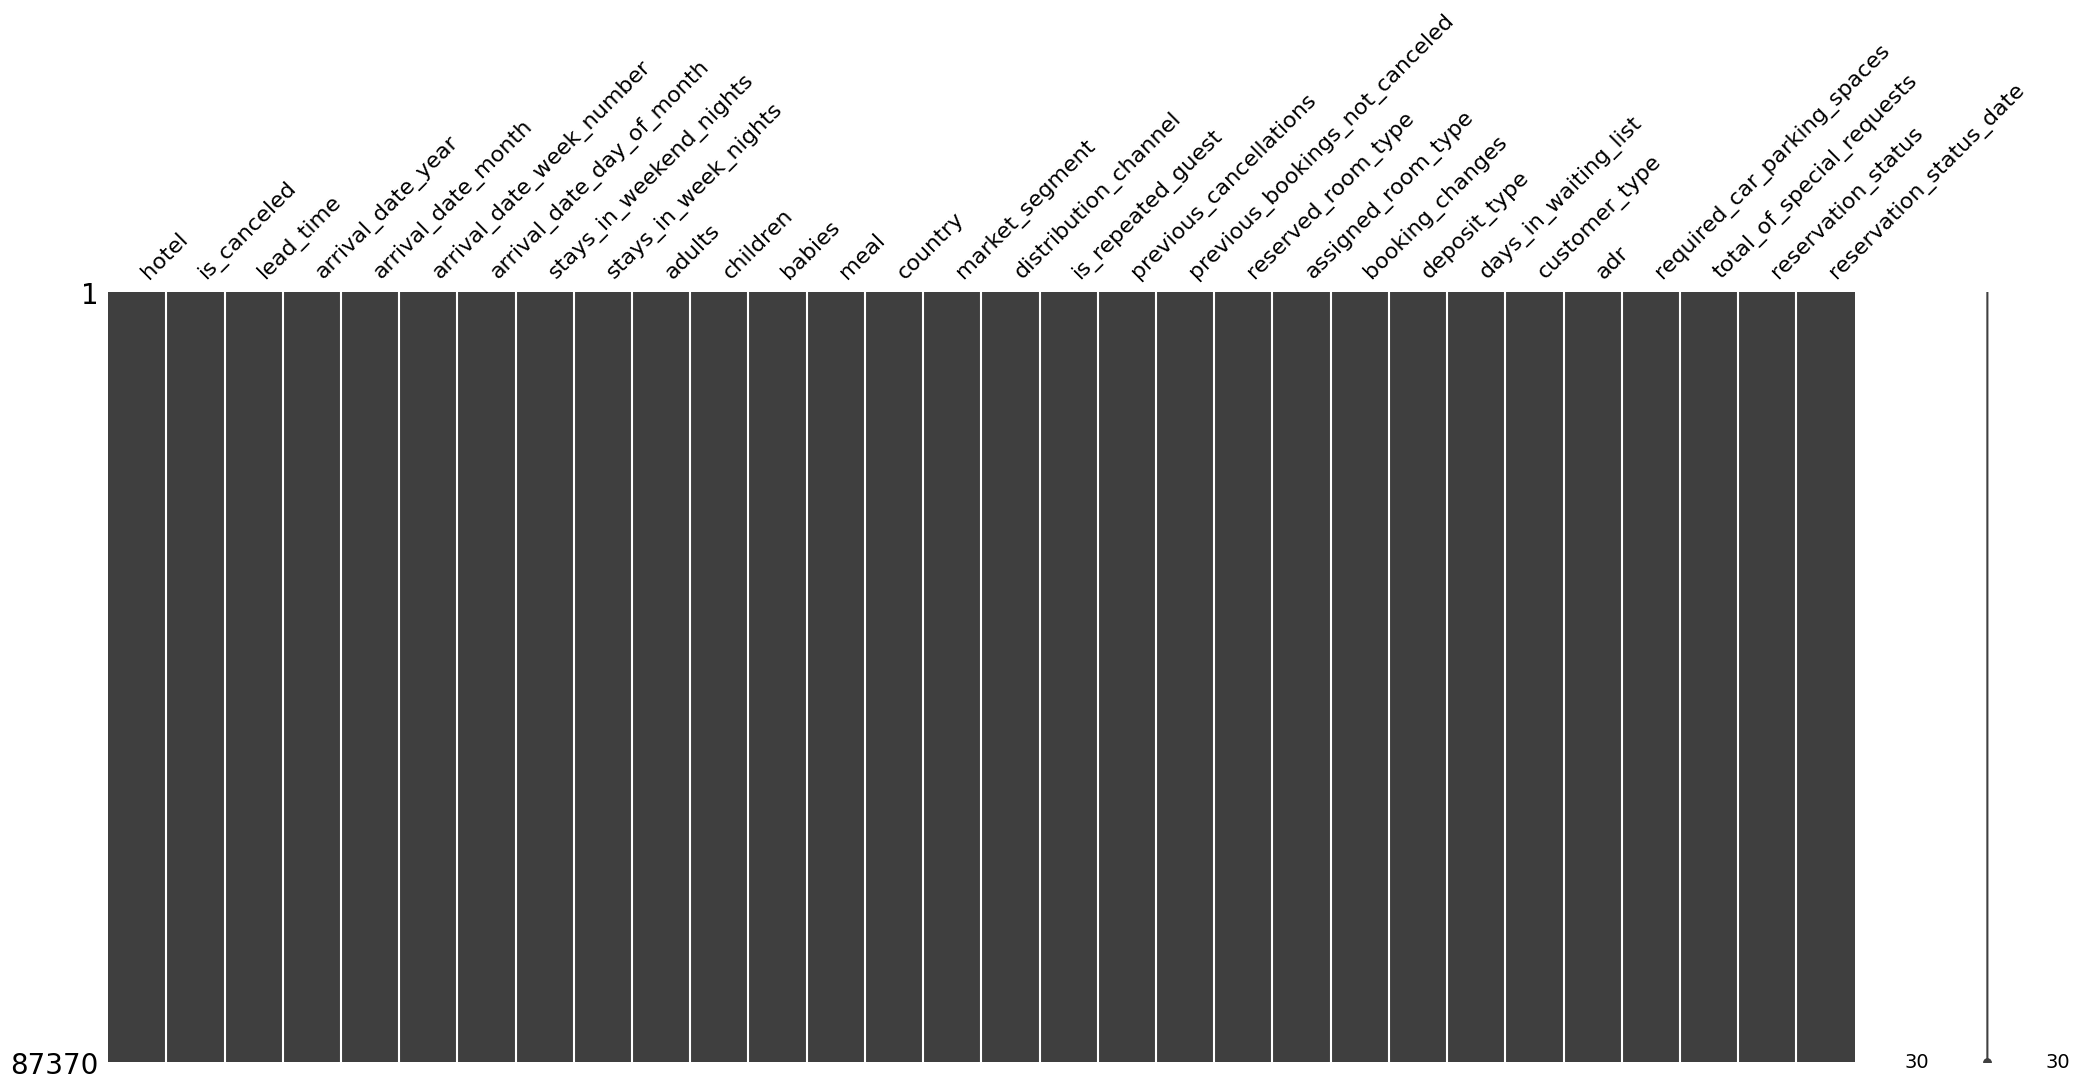

In [32]:
msno.matrix(df_sin_duplicados)

In [33]:
df_nulos = df_sin_duplicados.isnull().sum()

df_nulos

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# Valores atípicos


In [34]:
df_sin_duplicados.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.274934,79.900595,2016.210312,26.838549,15.815967,1.005414,2.625604,1.875873,0.138675,0.010805,0.039087,0.030422,0.184045,0.271661,0.749788,106.343157,0.084251,0.698649
std,0.446484,86.055086,0.686075,13.674188,8.835216,1.031980,2.053693,0.626521,0.455933,0.113515,0.193802,0.369200,1.732148,0.727331,10.017213,55.016143,0.281571,0.831985
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Seleccionar las columnas numéricas
columnas_numericas = df_sin_duplicados.select_dtypes(include=['number']).columns

# Imprimir los nombres de las columnas numéricas
print(columnas_numericas)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [13]:

#Definir la función para generar boxplots

def plot_boxplots(df_sin_duplicados, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # 3 boxplots por fila
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(y=df_sin_duplicados[col], ax=axes[i])
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_ylabel(col)
        axes[i].grid(axis='y')

    # Ocultar los subplots vacíos
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()



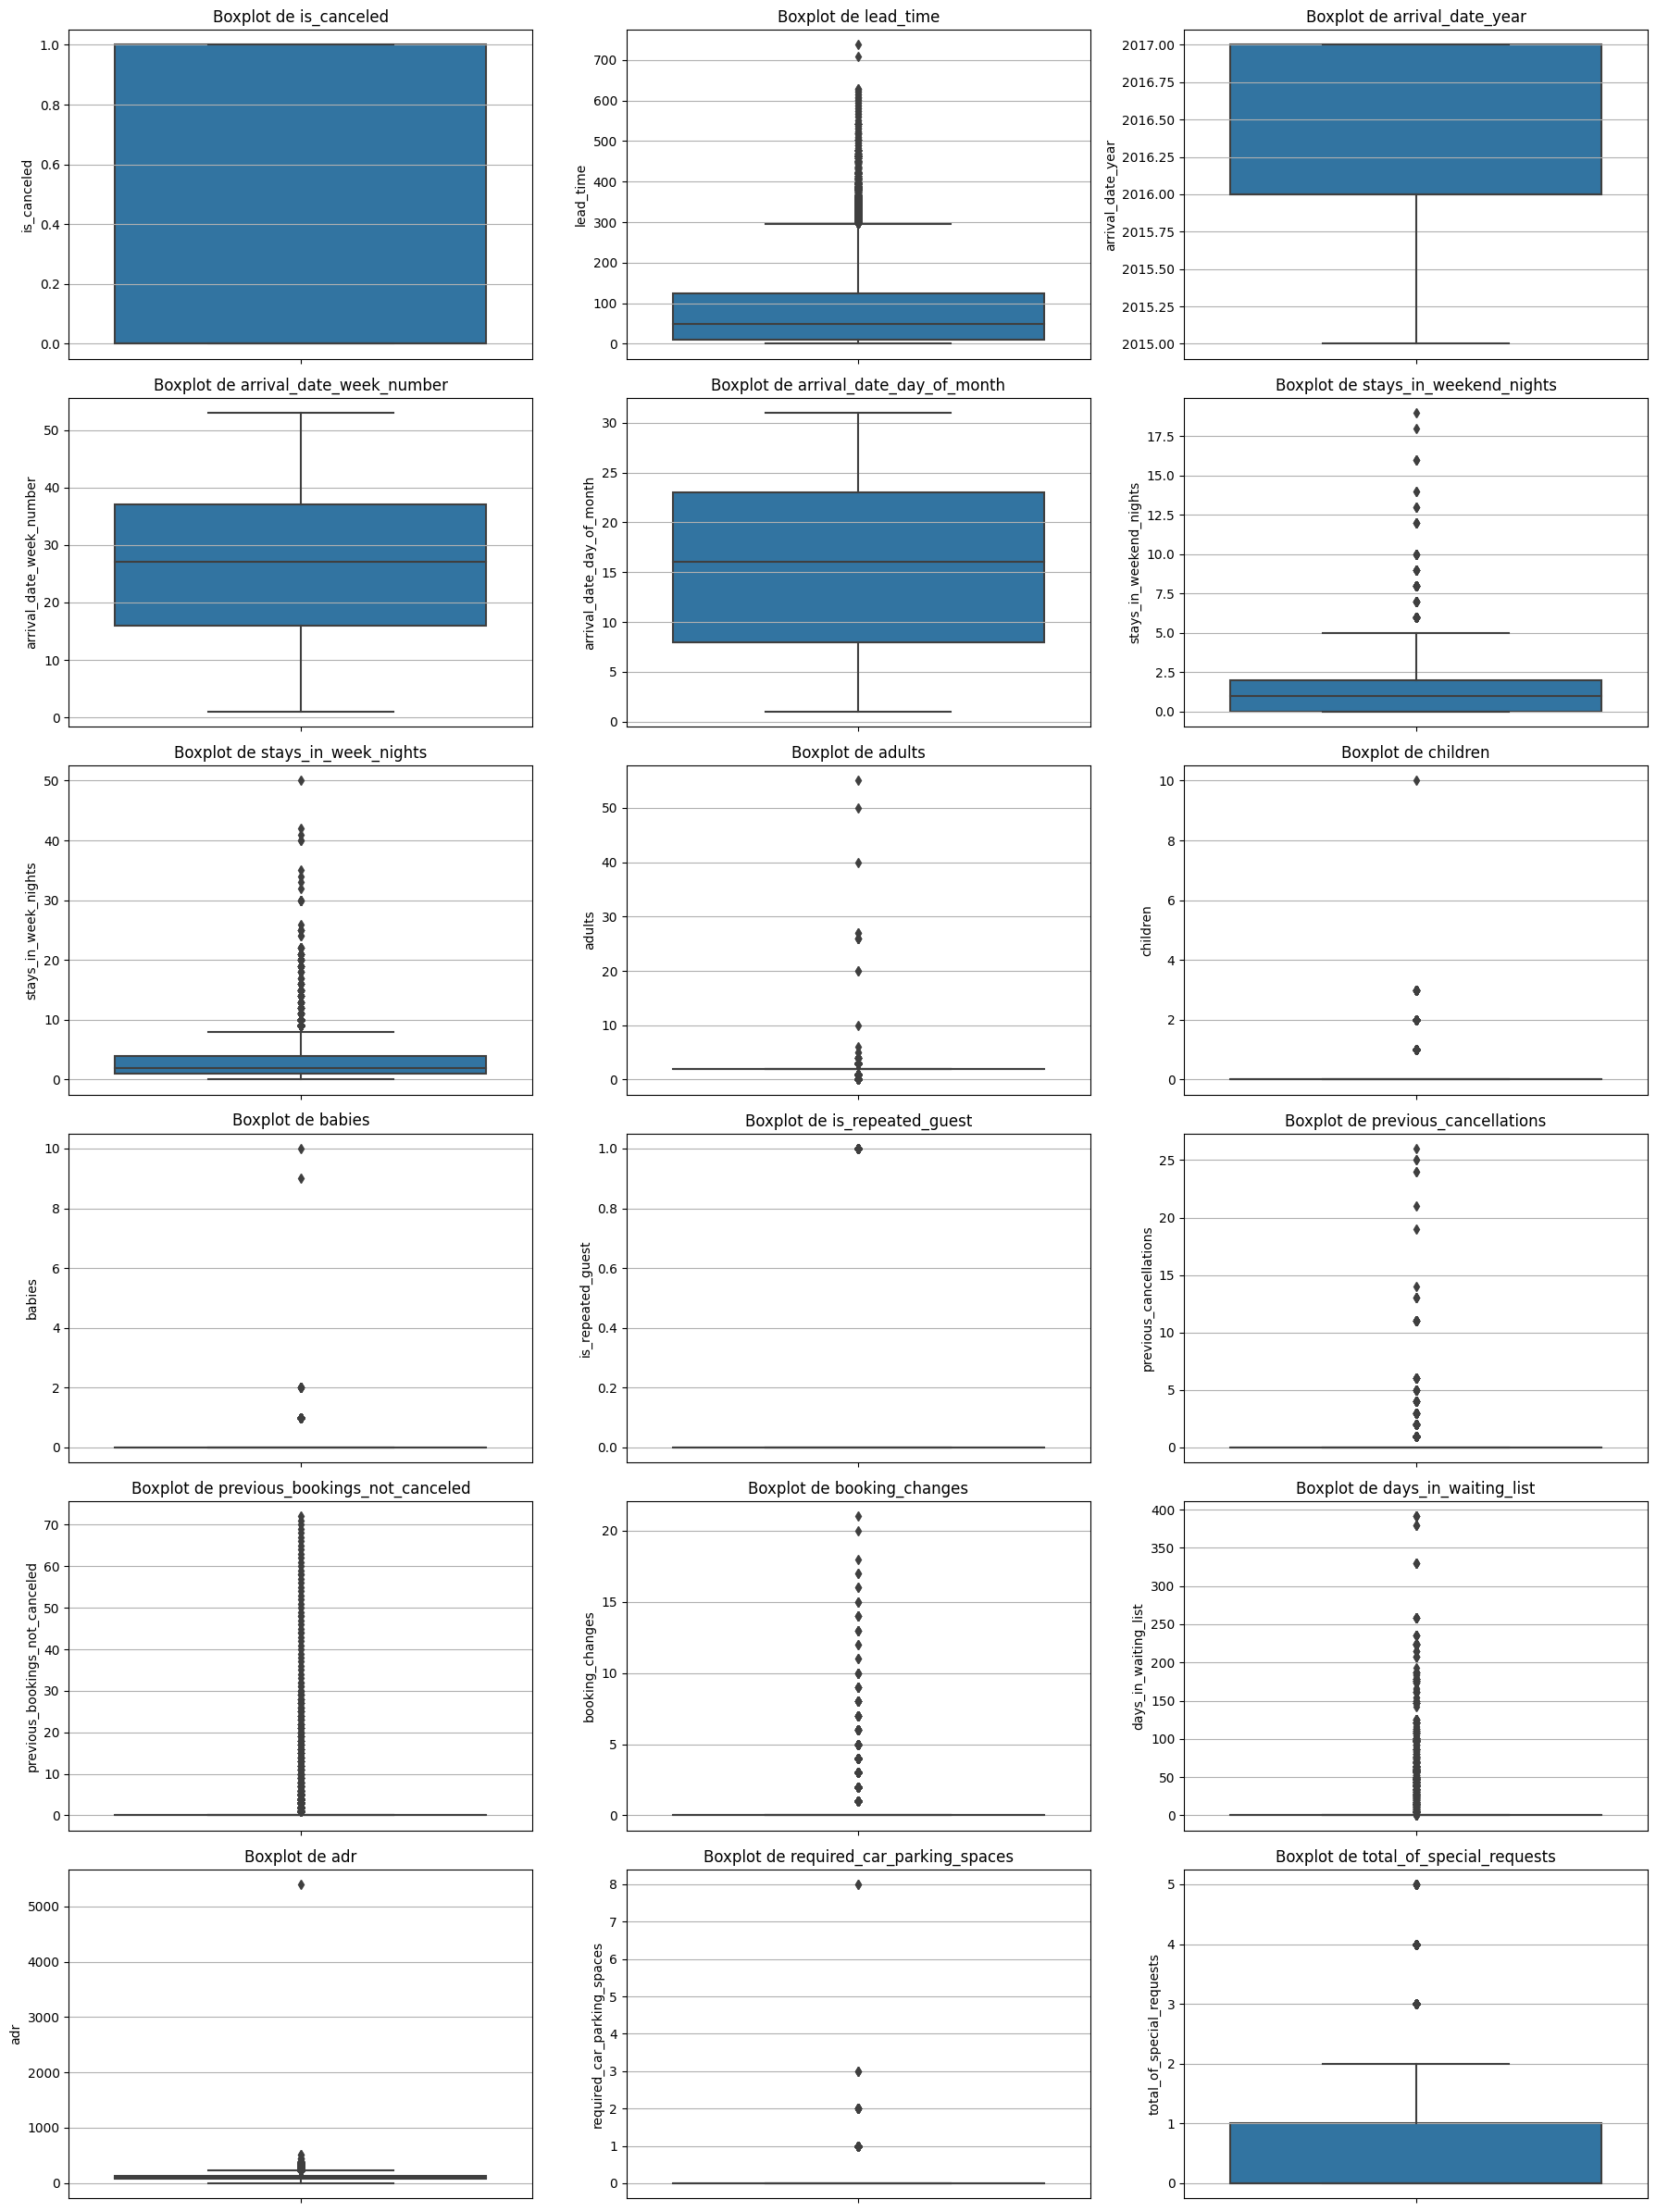

In [14]:
#  Llamar a la función con las columnas de interés

columns_to_analyze = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

plot_boxplots(df_sin_duplicados, columns_to_analyze)


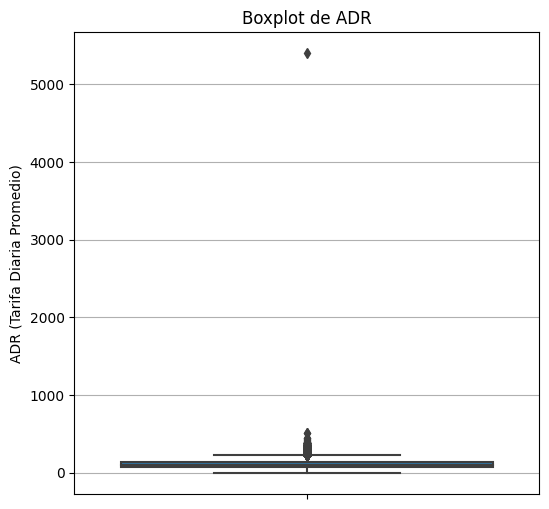

In [15]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_sin_duplicados['adr'])
plt.title('Boxplot de ADR')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.grid(axis='y')
plt.show()

In [16]:

valores_atipicos = df_sin_duplicados.loc[df_sin_duplicados['adr'] > 5000, ['hotel', 'adr']]

print(valores_atipicos)

            hotel     adr
48515  City Hotel  5400.0


### Nota
Para las preguntas :

¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

- Impacto: Alto. Los valores atípicos en adr pueden inflar significativamente el promedio, dando una impresión incorrecta del precio promedio por noche

¿Cómo varía el precio por noche durante el año?

- Impacto: Alto. Los valores atípicos pueden distorsionar la variación mensual del precio por noche, dando resultados que no reflejan la realidad.

##### Conclusión 

Eliminar los valor atípico




In [17]:
df_sin_duplicados = df_sin_duplicados[df_sin_duplicados['adr'] <= 5000]

# Exportando datos limpios



In [18]:
# Especifica la ruta y el nombre del archivo CSV que deseas crear
ruta_archivo_csv = './db/hotel_bookings_limpio.csv'

# Convertir el DataFrame a un archivo CSV
df_sin_duplicados.to_csv(ruta_archivo_csv, index=False, encoding='ISO-8859-1')

# Correlacion de datos númericos


In [64]:
# Calcular la matriz de correlaciones
matriz_correlaciones = df_sin_duplicados[columnas_numericas].corr()

# Crear la consola de Rich
console = Console()

# Crear la tabla con título
table = Table(title="Matriz de Correlaciones")

# Añadir la primera columna (nombres de las columnas numéricas)
table.add_column("Columnas", justify="left", style="cyan", no_wrap=True)

# Añadir las columnas de correlaciones
for column in matriz_correlaciones.columns:
    table.add_column(column, justify="center", style="magenta")

# Añadir las filas con los valores de correlación
for idx, row in matriz_correlaciones.iterrows():
    table.add_row(
        idx,  # Nombre de la fila
        *[f"{value:.2f}" for value in row]  # Valores formateados
    )

# Imprimir la tabla
console.print(table)

                                              Matriz de Correlaciones                                              
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┳━━━┳━━━━┓
┃ Columnas                       ┃ … ┃ l… ┃ … ┃ a… ┃ … ┃ s… ┃ … ┃ a… ┃ … ┃ b… ┃ … ┃ p… ┃ … ┃ b… ┃ … ┃ a… ┃ … ┃ t… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━╇━━━╇━━━━┩
│ is_canceled                    │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │
│ lead_time                      │ … │ 1… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_year              │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_week_number       │ … │ 0… │ … │ 1… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │
│ arrival_date_day_of_month      │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │
│ stays_in_weekend_nights        │ … │ 0… │ … │ 0… │ … │ 1… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ stays_in_week_nights           │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ adults                         │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │ … │ 0… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │
│ children                       │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ babies                         │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ is_repeated_guest              │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │
│ previous_cancellations         │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ 1… │ … │ -… │ … │ -… │ … │ 0… │
│ previous_bookings_not_canceled │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │
│ booking_changes                │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ -… │ … │ 1… │ … │ 0… │ … │ 0… │
│ days_in_waiting_list           │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ -… │
│ adr                            │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 1… │ … │ 0… │
│ required_car_parking_spaces    │ … │ -… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ -… │ … │ 0… │ … │ 0… │ … │ 0… │
│ total_of_special_requests      │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 0… │ … │ 1… │
└────────────────────────────────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┴───┴────┘

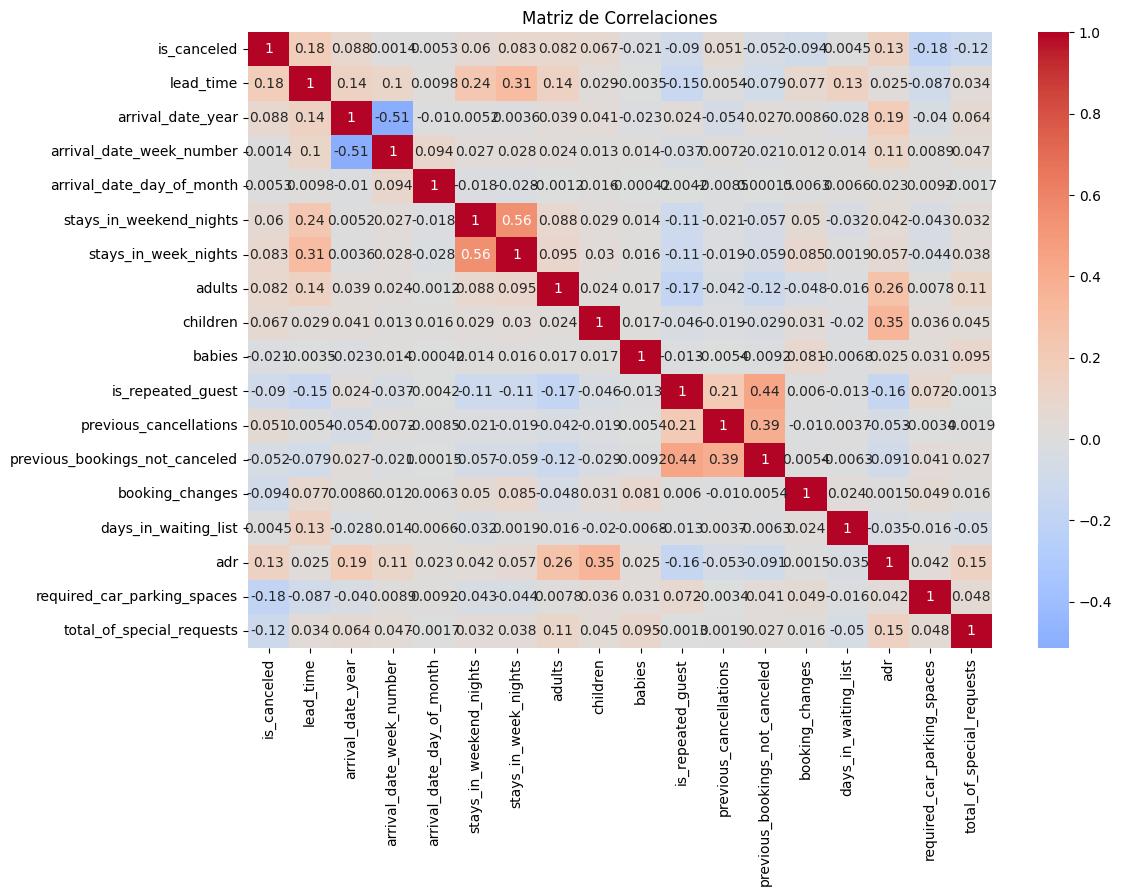

In [43]:
# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', center=0)

# Añadir título
plt.title('Matriz de Correlaciones')

# Mostrar el mapa de calor
plt.show()


# Preguntas de negocio


##### 1) ¿De dónde vienen los huéspedes?

In [44]:
# Calcular el conteo de huéspedes por país
conteo_paises = df_sin_duplicados['country'].value_counts()

# Seleccionar el top 10 de países
top_10_paises = conteo_paises.head(10)

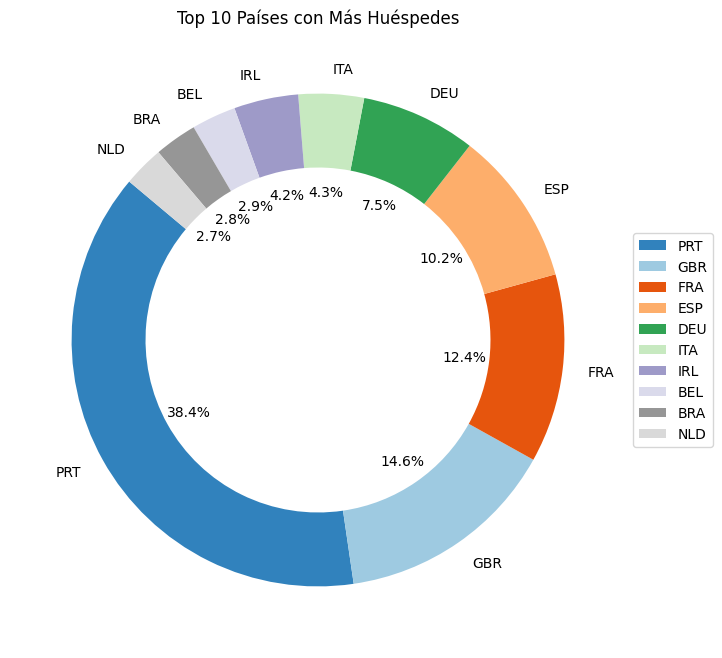

In [45]:
# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
top_10_paises.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20c', wedgeprops=dict(width=0.3))

# Título
plt.title('Top 10 Países con Más Huéspedes')
plt.ylabel('')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


##### 2) ¿Cuánto pagan los huéspedes por una habitación por noche en promedio?

In [46]:
print(df_sin_duplicados['adr'].median())  # Usar mediana para mayor robustez

98.1


In [47]:
print(df_sin_duplicados['adr'].mean()) 

106.28256692877336


##### 3) ¿Cómo varía el precio por noche durante el año?

In [48]:
print(df_sin_duplicados.groupby('arrival_date_month')['adr'].median())  # Usar mediana para mayor robustez

arrival_date_month
April         99.000
August       140.080
December      75.460
February      74.800
January       70.000
July         128.700
June         117.000
March         79.000
May          110.000
November      71.535
October       88.090
September    109.650
Name: adr, dtype: float64


In [49]:
# Crear la columna total_nights
df_sin_duplicados['total_nights'] = df_sin_duplicados['stays_in_weekend_nights'] + df_sin_duplicados['stays_in_week_nights']

In [50]:
# Calcular el promedio de adr por cada número de noches
promedio_adr_por_noches = df_sin_duplicados.groupby('total_nights')['adr'].mean().reset_index()



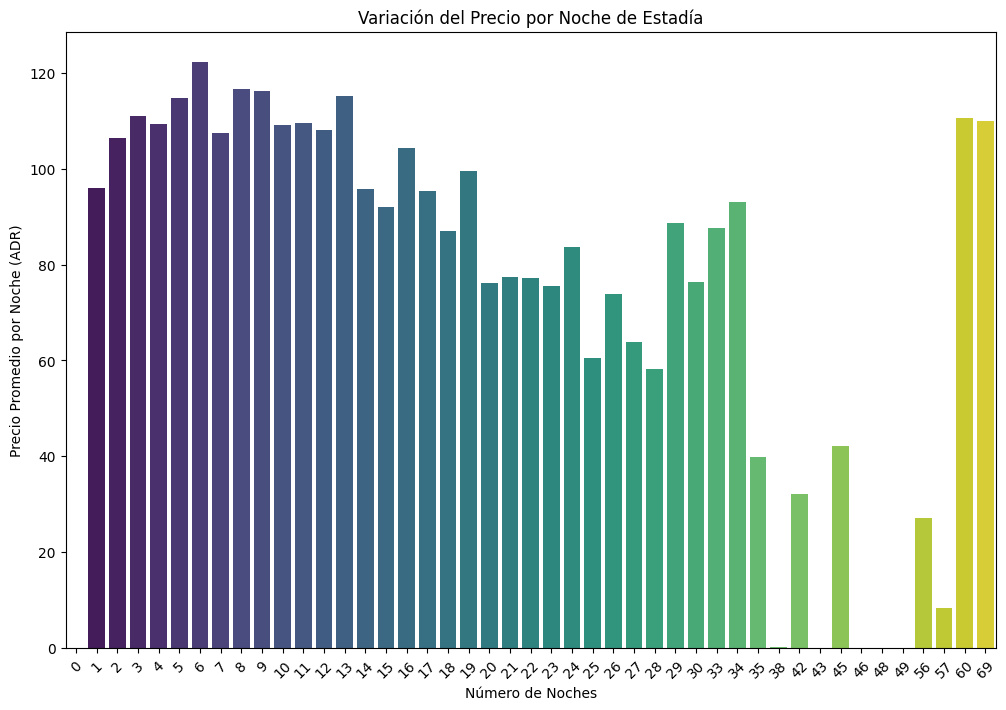

In [51]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='total_nights', y='adr', data=promedio_adr_por_noches, palette='viridis')

# Añadir título y etiquetas
plt.title('Variación del Precio por Noche de Estadía')
plt.xlabel('Número de Noches')
plt.ylabel('Precio Promedio por Noche (ADR)')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()



##### 4) ¿Cuáles son los meses más ocupados?

In [52]:

print(df_sin_duplicados['arrival_date_month'].value_counts())

August       11254
July         10053
May           8353
April         7906
June          7764
March         7510
October       6934
September     6688
February      6095
December      5129
November      4992
January       4691
Name: arrival_date_month, dtype: int64


In [53]:
# Calcular el conteo de reservas por mes
conteo_meses = df_sin_duplicados['arrival_date_month'].value_counts().sort_index()

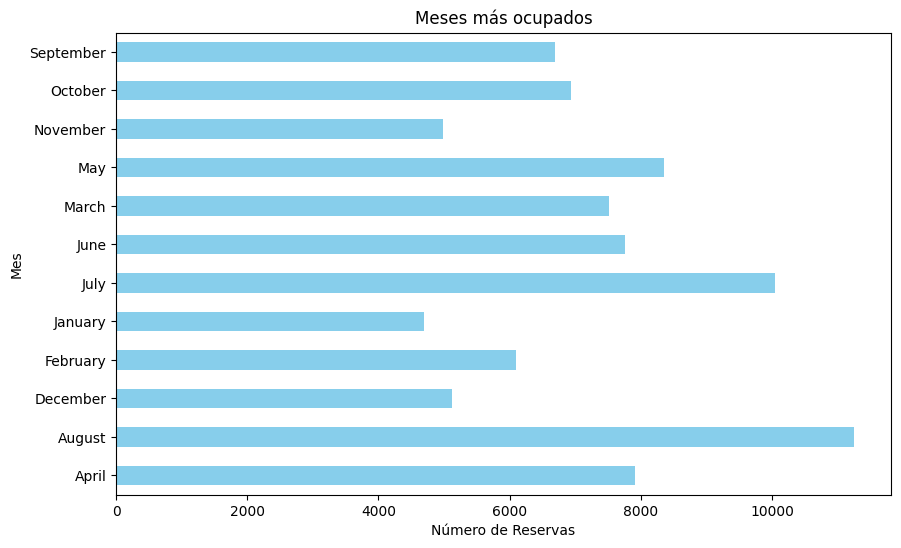

In [54]:
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
conteo_meses.plot(kind='barh', color='skyblue')

# Añadir título y etiquetas
plt.title('Meses más ocupados')
plt.xlabel('Número de Reservas')
plt.ylabel('Mes')

# Mostrar el gráfico
plt.show()


##### 5) ¿Cuánto tiempo se queda la gente en los hoteles (número de noches)?

In [55]:
# ¿Cuánto tiempo se queda la gente en los hoteles (número de noches)?
df_sin_duplicados['total_nights'] = df_sin_duplicados['stays_in_weekend_nights'] + df_sin_duplicados['stays_in_week_nights']
print(df_sin_duplicados['total_nights'].describe())

count    87369.000000
mean         3.631048
std          2.763629
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: total_nights, dtype: float64


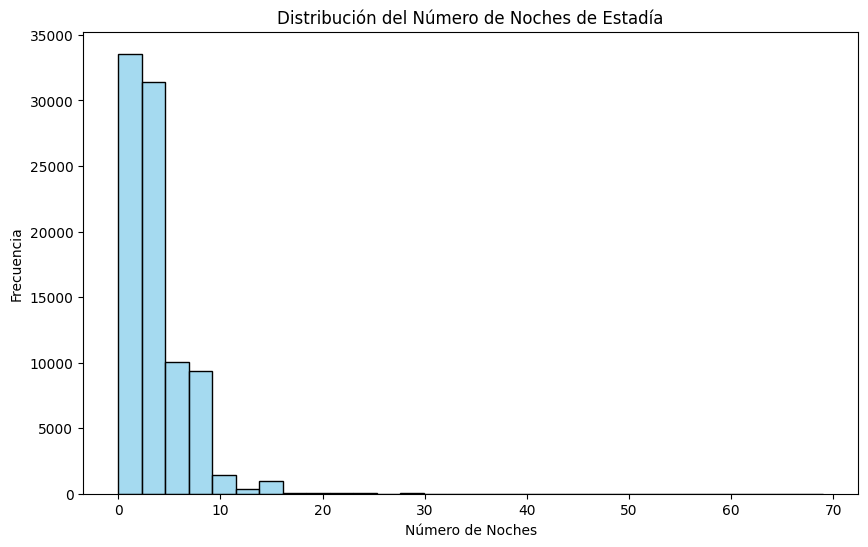

In [56]:
# Crear el histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_duplicados['total_nights'], bins=30, kde=False, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución del Número de Noches de Estadía')
plt.xlabel('Número de Noches')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


##### 6) Reservas por segmento de mercado

In [57]:
# Calcular el conteo de reservas por segmento de mercado
conteo_segmentos = df_sin_duplicados['market_segment'].value_counts()

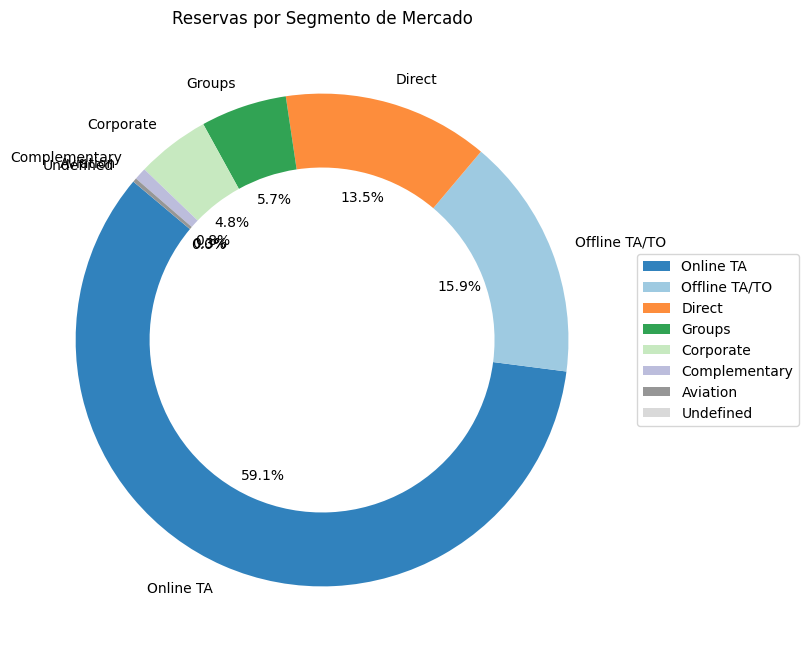

In [58]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
conteo_segmentos.plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab20c', wedgeprops=dict(width=0.3))

# Añadir título y etiquetas
plt.title('Reservas por Segmento de Mercado')
plt.ylabel('')
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.show()


##### 7) ¿Cuántas reservas se cancelaron?

In [59]:
print(df_sin_duplicados['is_canceled'].sum())

24020


##### 8) ¿Qué mes tiene el mayor número de cancelaciones?

In [60]:
print(df_sin_duplicados[df_sin_duplicados['is_canceled'] == 1]['arrival_date_month'].value_counts())

August       3621
July         3198
May          2442
April        2409
June         2353
March        1829
September    1642
October      1642
February     1415
December     1378
November     1053
January      1038
Name: arrival_date_month, dtype: int64


In [61]:
# Filtrar las cancelaciones
cancelaciones = df_sin_duplicados[df_sin_duplicados['is_canceled'] == 1]

# Calcular el conteo de cancelaciones por mes
cancelaciones_por_mes = cancelaciones['arrival_date_month'].value_counts().sort_index()

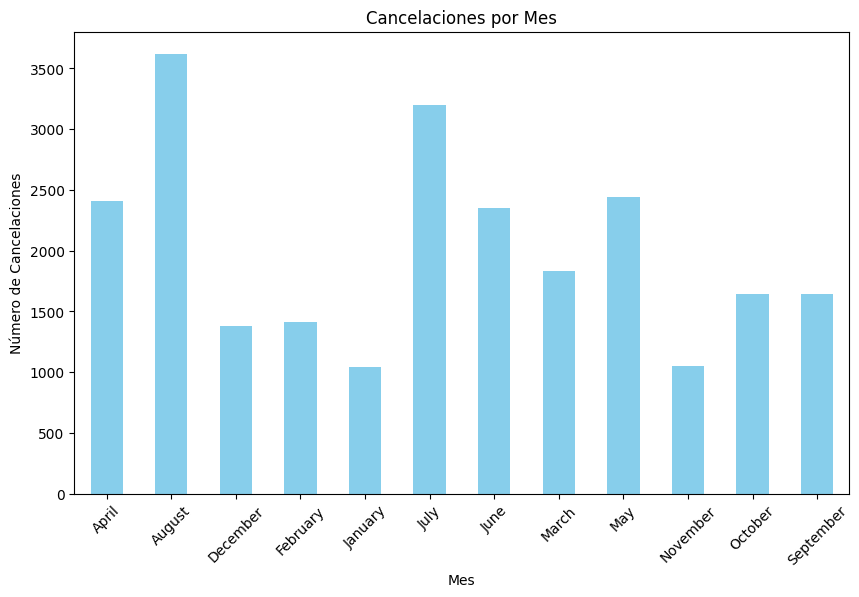

In [62]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
cancelaciones_por_mes.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Cancelaciones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Cancelaciones')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Diseño de modelo

##### 1. ¿Este es un problema de regresión o clasificación?

Este es un problema de clasificación. La tarea es predecir si una reserva será cancelada o no, lo cual es una variable categórica (is_canceled).

##### 2. Hacer tabla de correlación para las variables

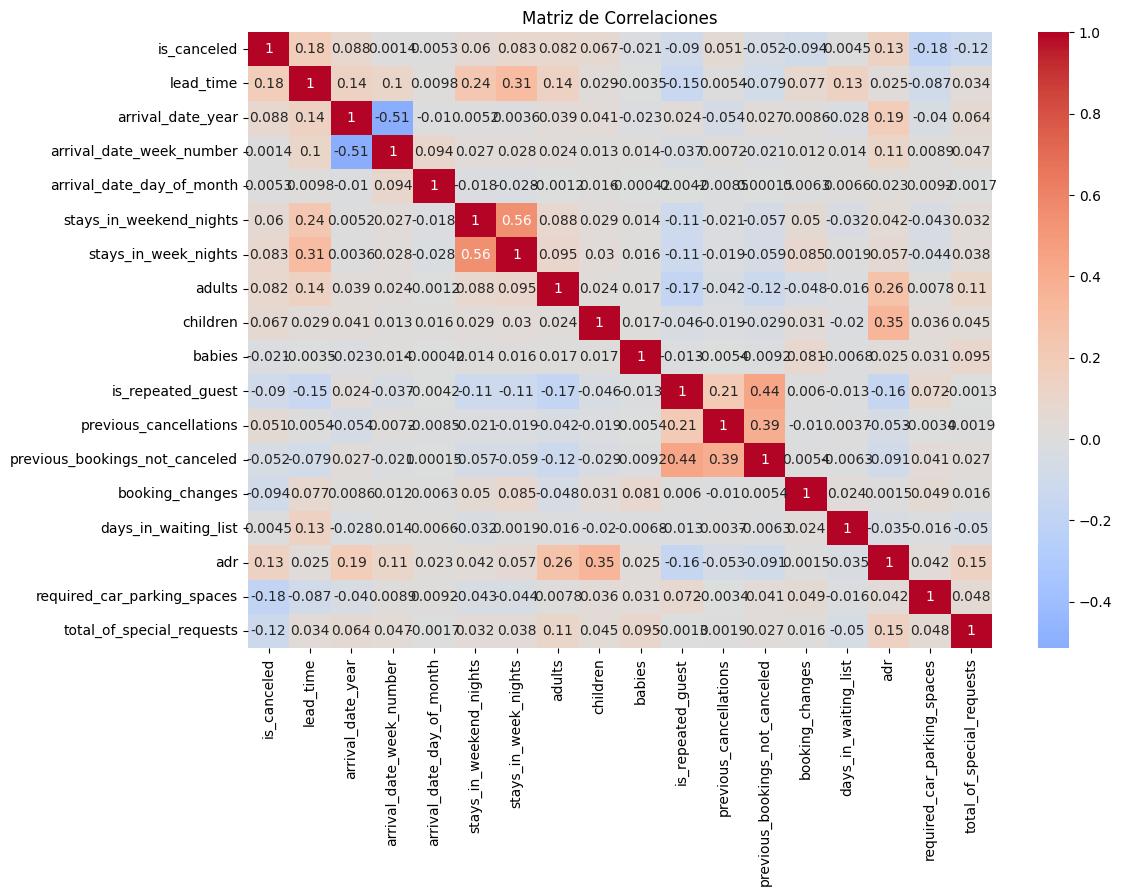

In [65]:
# Crear un mapa de calor de la matriz de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', center=0)

# Añadir título
plt.title('Matriz de Correlaciones')

# Mostrar el mapa de calor
plt.show()

##### 3. Encontrar las mejores variables para predecir cancelaciones

In [69]:
# Seleccionar las mejores variables
X = df_sin_duplicados[columnas_numericas]
y = df_sin_duplicados['is_canceled']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las variables seleccionadas
mask = selector.get_support()  # lista de booleanos
new_features = []  # La lista de las mejores características

for bool, feature in zip(mask, columnas_numericas):
    if bool:
        new_features.append(feature)

print(f"Las mejores variables para predecir cancelaciones son: {new_features}")

Las mejores variables para predecir cancelaciones son: ['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


##### 4. ¿Cuál es el modelo con mayor performance?

In [97]:
# Crear una consola Rich
console = Console()


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[new_features], y, test_size=0.2, random_state=42)


# Inicializar tabla para los resultados
result_table = Table(title="Resultados de Modelos", show_lines=True)
result_table.add_column("Modelo", justify="left", style="bright_cyan")
result_table.add_column("Precisión", justify="center", style="bright_green")
result_table.add_column("Reporte de Clasificación", justify="left", style="bright_magenta")




# Entrenar y evaluar el Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt, output_dict=False)

# Añadir los resultados a la tabla
result_table.add_row(
    "Árbol de Decisión",
    f"{dt_accuracy:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_pred_dt)}[/bold bright_magenta]"
)




# Entrenar y evaluar el Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, output_dict=False)

# Añadir los resultados a la tabla
result_table.add_row(
    "Random Forest",
    f"{rf_accuracy:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_pred_rf)}[/bold bright_magenta]"
)






# Entrenar y evaluar la Regresión Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_report = classification_report(y_test, y_pred_lr, output_dict=False)

# Añadir los resultados a la tabla
result_table.add_row(
    "Regresión Logística",
    f"{lr_accuracy:.2f}",
    f"[bold bright_magenta]{classification_report(y_test, y_pred_lr)}[/bold bright_magenta]"
)





# Determinar el modelo con mejor precisión
best_model = max(
    [("Árbol de Decisión", dt_accuracy), 
     ("Random Forest", rf_accuracy), 
     ("Regresión Logística", lr_accuracy)], 
    key=lambda x: x[1]
)

# Imprimir resultados
console.print(result_table)
console.print(f"[bold yellow]El modelo con mayor performance es: {best_model[0]} con una precisión de {best_model[1]:.2f}[/bold yellow]")



                                   Resultados de Modelos                                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Modelo              ┃ Precisión ┃ Reporte de Clasificación                              ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Árbol de Decisión   │   1.00    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       1.00      1.00      1.00     12676 │
│                     │           │            1       1.00      1.00      1.00      4798 │
│                     │           │                                                       │
│                     │           │     accuracy                           1.00     17474 │
│                     │           │    macro avg       1.00      1.00      1.00     17474 │
│                     │           │ weighted avg       1.00      1.00      1.00     17474 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Random Forest       │   1.00    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       1.00      1.00      1.00     12676 │
│                     │           │            1       1.00      1.00      1.00      4798 │
│                     │           │                                                       │
│                     │           │     accuracy                           1.00     17474 │
│                     │           │    macro avg       1.00      1.00      1.00     17474 │
│                     │           │ weighted avg       1.00      1.00      1.00     17474 │
│                     │           │                                                       │
├─────────────────────┼───────────┼───────────────────────────────────────────────────────┤
│ Regresión Logística │   1.00    │               precision    recall  f1-score   support │
│                     │           │                                                       │
│                     │           │            0       1.00      1.00      1.00     12676 │
│                     │           │            1       1.00      1.00      1.00      4798 │
│                     │           │                                                       │
│                     │           │     accuracy                           1.00     17474 │
│                     │           │    macro avg       1.00      1.00      1.00     17474 │
│                     │           │ weighted avg       1.00      1.00      1.00     17474 │
│                     │           │                                                       │
└─────────────────────┴───────────┴───────────────────────────────────────────────────────┘

El modelo con mayor performance es: Árbol de Decisión con una precisión de 1.00

###### Dividir los datos en conjuntos de entrenamiento y prueba

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X[new_features], y, test_size=0.2, random_state=42)


###### Creación del modelo

In [99]:
dt_model = DecisionTreeClassifier(random_state=42)

###### Entrenamiento

In [100]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

###### Evalucación del modelo

In [101]:
# Calculo de Predicciones en train como en test

y_train_pred = dt_model.predict(X_train)

y_test_pred = dt_model.predict(X_test)

In [102]:
# Cáclculo de las metricas

# Cálculo del acuracy en train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Cálculo del acuracy en test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es: ', train_accuracy)
print('El accuracy en test es: ', test_accuracy)

El accuracy en train es:  1.0
El accuracy en test es:  1.0


###### Verificar la importancia de importancia

In [106]:

# Seleccionar las mejores variables
X = df_sin_duplicados[columnas_numericas]
y = df_sin_duplicados['is_canceled']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las variables seleccionadas
mask = selector.get_support()  # lista de booleanos
new_features = []  # La lista de las mejores características

for bool, feature in zip(mask, columnas_numericas):
    if bool:
        new_features.append(feature)

print(f"Las mejores variables para predecir cancelaciones son: {new_features}")

Las mejores variables para predecir cancelaciones son: ['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Variables más importantes para predecir cancelaciones:
is_canceled: 0.9431861780206768
lead_time: 0.02279442115408775
required_car_parking_spaces: 0.01097285304096971
total_of_special_requests: 0.0076874485948099135
adr: 0.006898660280779147
booking_changes: 0.004989739944671818
arrival_date_year: 0.001418785058904995
stays_in_week_nights: 0.0013038921272196743
adults: 0.0005347672324318189
is_repeated_guest: 0.00021325454544842242


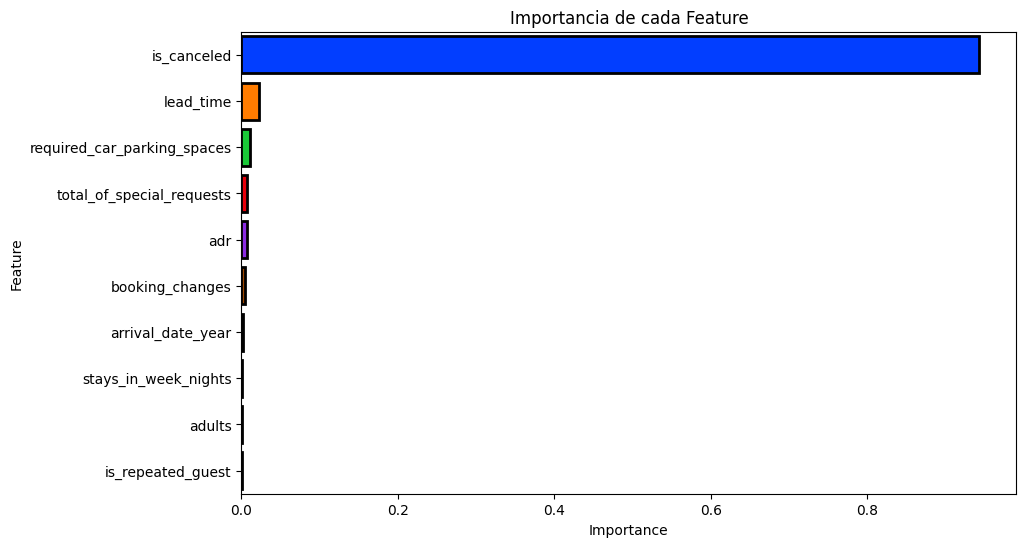

In [107]:
# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X[new_features], y)

# Obtener la importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las variables más importantes
print("Variables más importantes para predecir cancelaciones:")
for f in range(len(new_features)):
    print(f"{new_features[indices[f]]}: {importances[indices[f]]}")

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({'Feature': [new_features[i] for i in indices], 'Importance': importances[indices]})

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='bright', saturation=2.0, edgecolor='black', linewidth=2)
plt.title('Importancia de cada Feature')
plt.show()

##### 5. ¿Cuáles son las variables más importantes para predecir cancelaciones?

In [74]:
# Seleccionar las mejores variables
X = df_sin_duplicados[columnas_numericas]
y = df_sin_duplicados['is_canceled']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las variables seleccionadas
mask = selector.get_support()  # lista de booleanos
new_features = []  # La lista de las mejores características

for bool, feature in zip(mask, columnas_numericas):
    if bool:
        new_features.append(feature)

print(f"Las mejores variables para predecir cancelaciones son: {new_features}")

Las mejores variables para predecir cancelaciones son: ['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


##### 6. Evaluar el comportamiento de las tres variables más importantes con respecto a la cancelación

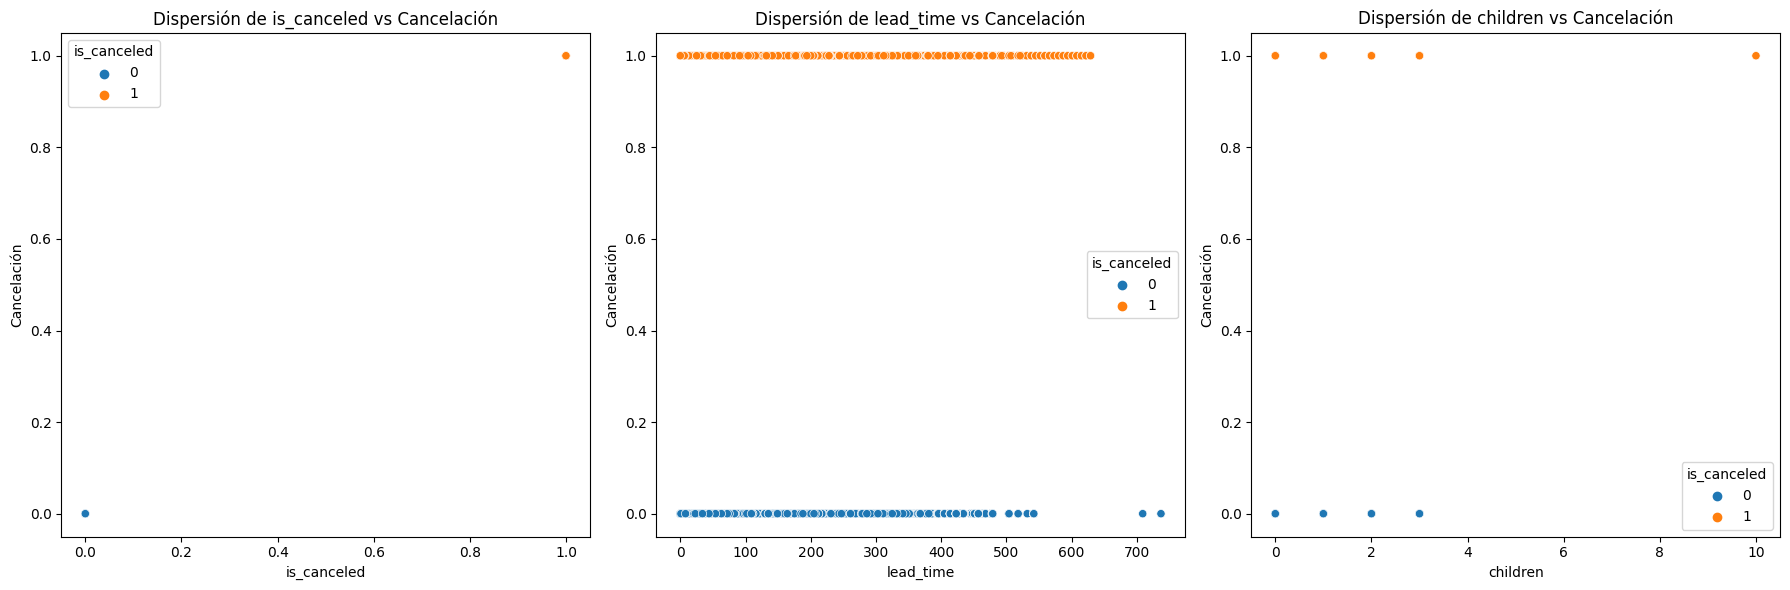

In [75]:
# Seleccionar las tres variables más importantes
top_3_features = X.columns[indices[:3]]

# Crear gráficos de dispersión para las tres variables más importantes
plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df_sin_duplicados[feature], y=df_sin_duplicados['is_canceled'], hue=df_sin_duplicados['is_canceled'])
    plt.title(f'Dispersión de {feature} vs Cancelación')
    plt.xlabel(feature)
    plt.ylabel('Cancelación')
plt.tight_layout()
plt.show()

###### Árbol de Decisión

In [90]:
# Crear la consola Rich con tema claro
console = Console(style="bright_green")

# Entrenar el modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Crear tabla para mostrar la evaluación del modelo
result_table = Table(
    title="Evaluación del Modelo: Árbol de Decisión",
    show_header=True,
    header_style="bold white",
    style="white",
    border_style="white"
)

result_table.add_column("Métrica", justify="left", style="white")
result_table.add_column("Valor", justify="center", style="white")

# Añadir precisión a la tabla
result_table.add_row("Precisión", f"{dt_accuracy:.2f}")

# Crear un panel para el reporte de clasificación
report_panel = Panel(
    dt_report,
    title="Reporte de Clasificación",
    title_align="center",
    border_style="white"
)

# Imprimir resultados
console.print(result_table)
console.print(report_panel)

   Evaluación del    
  Modelo: Árbol de   
      Decisión       
┏━━━━━━━━━━━┳━━━━━━━┓
┃ Métrica   ┃ Valor ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ Precisión │ 1.00  │
└───────────┴───────┘

╭─────────────────────────────────────────── Reporte de Clasificación ────────────────────────────────────────────╮
│               precision    recall  f1-score   support                                                           │
│                                                                                                                 │
│            0       1.00      1.00      1.00     12676                                                           │
│            1       1.00      1.00      1.00      4798                                                           │
│                                                                                                                 │
│     accuracy                           1.00     17474                                                           │
│    macro avg       1.00      1.00      1.00     17474                                                           │
│ weighted avg       1.00      1.00      1.00     17474                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

###### Random Forest

In [92]:
# Crear la consola Rich con tema claro
console = Console(style="bright_magenta")

# Entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)

# Crear tabla para mostrar la evaluación del modelo
result_table = Table(
    title="Evaluación del Modelo: Random Forest",
    show_header=True,
    header_style="bold white",
    style="white",
    border_style="white"
)

result_table.add_column("Métrica", justify="left", style="white")
result_table.add_column("Valor", justify="center", style="white")

# Añadir precisión a la tabla
result_table.add_row("Precisión", f"{dt_accuracy:.2f}")

# Crear un panel para el reporte de clasificación
report_panel = Panel(
    dt_report,
    title="Reporte de Clasificación",
    title_align="center",
    border_style="white"
)

# Imprimir resultados
console.print(result_table)
console.print(report_panel)

   Evaluación del    
Modelo: Random Forest
┏━━━━━━━━━━━┳━━━━━━━┓
┃ Métrica   ┃ Valor ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ Precisión │ 1.00  │
└───────────┴───────┘

╭─────────────────────────────────────────── Reporte de Clasificación ────────────────────────────────────────────╮
│               precision    recall  f1-score   support                                                           │
│                                                                                                                 │
│            0       1.00      1.00      1.00     12676                                                           │
│            1       1.00      1.00      1.00      4798                                                           │
│                                                                                                                 │
│     accuracy                           1.00     17474                                                           │
│    macro avg       1.00      1.00      1.00     17474                                                           │
│ weighted avg       1.00      1.00      1.00     17474                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

###### Regresión Logística

In [88]:
# Crear la consola Rich con tema claro
#console = Console(style="bright_magenta")
console = Console(style="bright_cyan ")


# Entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

# Crear tabla para mostrar la evaluación del modelo
result_table = Table(
    title="Evaluación del Modelo: Random Forest",
    show_header=True,
    header_style="bold white",
    style="white",
    border_style="white"
)

result_table.add_column("Métrica", justify="left", style="white")
result_table.add_column("Valor", justify="center", style="white")

# Añadir precisión a la tabla
result_table.add_row("Precisión", f"{rf_accuracy:.2f}")

# Crear un panel para el reporte de clasificación
report_panel = Panel(
    rf_report,
    title="Reporte de Clasificación",
    title_align="center",
    border_style="white"
)

# Imprimir resultados
console.print(result_table)
console.print(report_panel)

   Evaluación del    
Modelo: Random Forest
┏━━━━━━━━━━━┳━━━━━━━┓
┃ Métrica   ┃ Valor ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ Precisión │ 1.00  │
└───────────┴───────┘

╭─────────────────────────────────────────── Reporte de Clasificación ────────────────────────────────────────────╮
│               precision    recall  f1-score   support                                                           │
│                                                                                                                 │
│            0       1.00      1.00      1.00     12676                                                           │
│            1       1.00      1.00      1.00      4798                                                           │
│                                                                                                                 │
│     accuracy                           1.00     17474                                                           │
│    macro avg       1.00      1.00      1.00     17474                                                           │
│ weighted avg       1.00      1.00      1.00     17474                                                           │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

# Pruebas


In [93]:
# Seleccionar las mejores variables
X = df_sin_duplicados[columnas_numericas]
y = df_sin_duplicados['is_canceled']

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Obtener los nombres de las variables seleccionadas
mask = selector.get_support()  # lista de booleanos
new_features = []  # La lista de las mejores características

for bool, feature in zip(mask, columnas_numericas):
    if bool:
        new_features.append(feature)

print(f"Las mejores variables para predecir cancelaciones son: {new_features}")

Las mejores variables para predecir cancelaciones son: ['is_canceled', 'lead_time', 'arrival_date_year', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'booking_changes', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


c:\Users\ASUS\OneDrive\Documentos\1aaaaEsposo_Jaime\U_Trabajo\perfilPython\mi_entorno\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Variables más importantes para predecir cancelaciones:
is_canceled: 0.9431861780206768
lead_time: 0.02279442115408775
required_car_parking_spaces: 0.01097285304096971
total_of_special_requests: 0.0076874485948099135
adr: 0.006898660280779147
booking_changes: 0.004989739944671818
arrival_date_year: 0.001418785058904995
stays_in_week_nights: 0.0013038921272196743
adults: 0.0005347672324318189
is_repeated_guest: 0.00021325454544842242


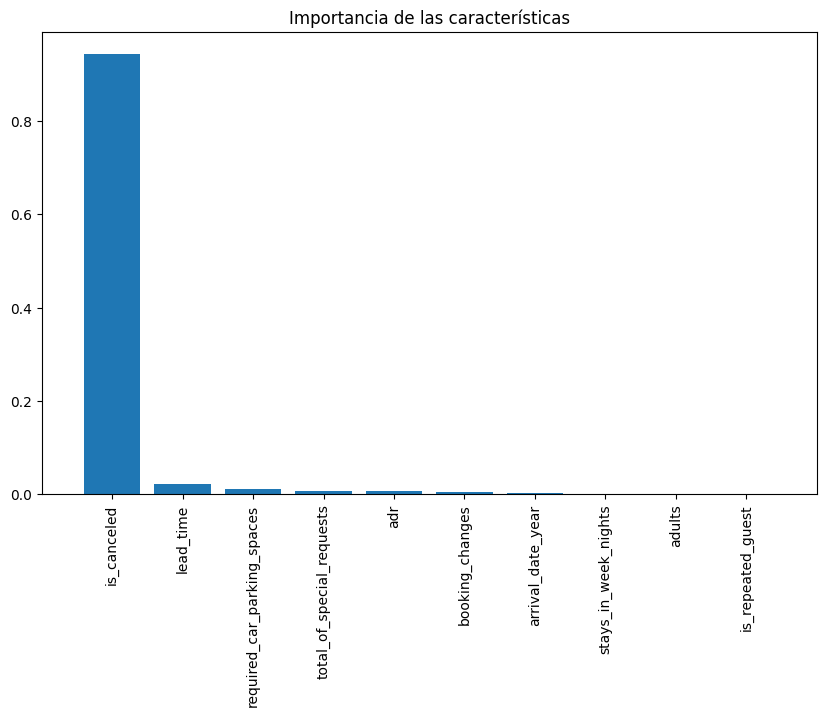

In [94]:


# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X[new_features], y)

# Obtener la importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Imprimir las variables más importantes
print("Variables más importantes para predecir cancelaciones:")
for f in range(len(new_features)):
    print(f"{new_features[indices[f]]}: {importances[indices[f]]}")

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(len(new_features)), importances[indices], align="center")
plt.xticks(range(len(new_features)), [new_features[i] for i in indices], rotation=90)
plt.xlim([-1, len(new_features)])
plt.show()


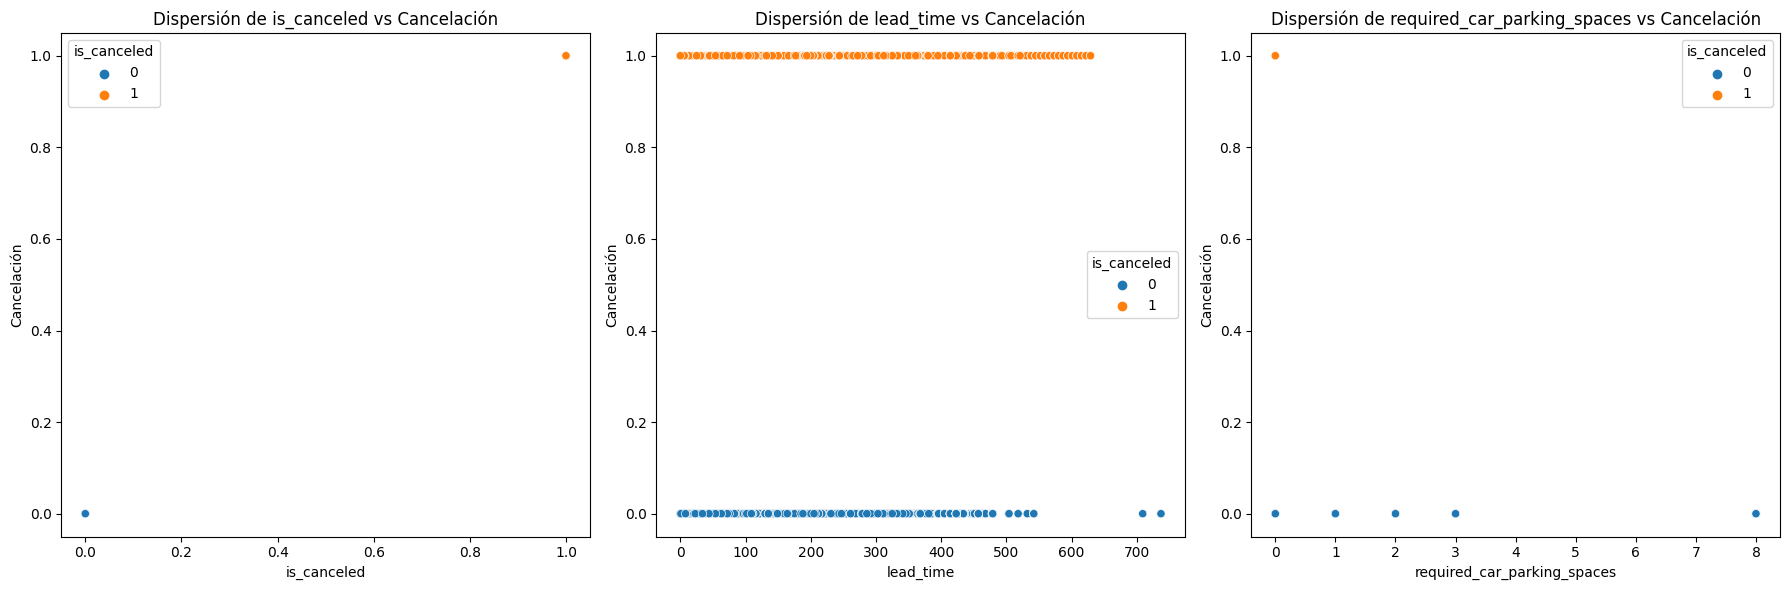

In [95]:
import seaborn as sns

# Seleccionar las tres variables más importantes
top_3_features = [new_features[i] for i in indices[:3]]

# Crear gráficos de dispersión para las tres variables más importantes
plt.figure(figsize=(18, 6))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df_sin_duplicados[feature], y=df_sin_duplicados['is_canceled'], hue=df_sin_duplicados['is_canceled'])
    plt.title(f'Dispersión de {feature} vs Cancelación')
    plt.xlabel(feature)
    plt.ylabel('Cancelación')
plt.tight_layout()
plt.show()
